In [5]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from uncertainties import *
from uncertainties.umath import *

In [6]:
#Reading data

lom = pd.read_excel('data/lom.xlsx')
waves = pd.read_excel('data/waves.xlsx')

In [7]:
# Constants and values

phi_1_1 = [283 , 27 , 29]
phi_2_1 = [163 , 27 , 31]

phi_1_2	= [278 , 35 , 50]
phi_2_2 = [158 , 35 , 56]

phi_1_3	= [272 , 55 , 48]
phi_2_3 = [152 , 55 , 44]

lambda_m = [623.4, 576.9, 546.1, 491.6, 435.8, 404.6]
lambda_frau = np.array([656.3, 486.1, 587.6])

radians = np.pi/180
degrees = 180/np.pi

def dms_to_decimal(degrees, minutes, seconds):
    decimal_degrees = degrees + (minutes / 60) + (seconds / 3600)
    return decimal_degrees

In [8]:
# Calculation 

lom['phi_1_decimal'] = dms_to_decimal(lom['phi_1_deg'], lom['phi_1_min'], lom['phi_1_sec'])
lom['phi_2_decimal'] = dms_to_decimal(lom['phi_2_deg'], lom['phi_2_min'], lom['phi_2_sec'])

waves['phi_1_decimal'] = dms_to_decimal(waves['phi_1_deg'], waves['phi_1_min'], waves['phi_1_sec'])
waves['phi_2_decimal'] = dms_to_decimal(waves['phi_2_deg'], waves['phi_2_min'], waves['phi_2_sec'])

phi_1_1_decimal = ufloat(dms_to_decimal(phi_1_1[0], phi_1_1[1], phi_1_1[2]), 0.000277778)
phi_2_1_decimal = ufloat(dms_to_decimal(phi_2_1[0], phi_2_1[1], phi_2_1[2]), 0.000277778)

# print('phi_1_1_decimal = ', phi_1_1_decimal)
# print('phi_2_1_decimal = ', phi_2_1_decimal)

phi_1_2_decimal = ufloat(dms_to_decimal(phi_1_2[0], phi_1_2[1], phi_1_2[2]), 0.000277778)
phi_2_2_decimal = ufloat(dms_to_decimal(phi_2_2[0], phi_2_2[1], phi_2_2[2]), 0.000277778)

# print('phi_1_2_decimal = ', phi_1_2_decimal)
# print('phi_2_2_decimal = ', phi_2_2_decimal)

phi_1_3_decimal = ufloat(dms_to_decimal(phi_1_3[0], phi_1_3[1], phi_1_3[2]), 0.000277778)
phi_2_3_decimal = ufloat(dms_to_decimal(phi_2_3[0], phi_2_3[1], phi_2_3[2]), 0.000277778)

# print('phi_1_3_decimal = ', phi_1_3_decimal)
# print('phi_2_3_decimal = ', phi_2_3_decimal)

lom_phi_1_list =[]
lom_phi_2_list =[]
for ii,ID in enumerate(lom['phi_1_decimal']):
    lom_phi_1_list.append(ufloat(lom['phi_1_decimal'][ii], 0.000277778))
    lom_phi_2_list.append(ufloat(lom['phi_2_decimal'][ii], 0.000277778))
lom['phi_1_comb'] = lom_phi_1_list
lom['phi_2_comb'] = lom_phi_2_list

waves_phi_1_list =[]
waves_phi_2_list =[]
for ii,ID in enumerate(waves['phi_1_decimal']):
    waves_phi_1_list.append(ufloat(waves['phi_1_decimal'][ii], 0.000277778))
    waves_phi_2_list.append(ufloat(waves['phi_2_decimal'][ii], 0.000277778))
waves['phi_1_comb'] = waves_phi_1_list
waves['phi_2_comb'] = waves_phi_2_list

lom['omega'] = 180 - (lom['phi_1_comb'] - lom['phi_2_comb'])

omega_phi_1_1 = 180 - (phi_1_1_decimal - phi_2_1_decimal)
omega_phi_1_2 = 180 - (phi_1_2_decimal - phi_2_2_decimal)
omega_phi_1_3 = 180 - (phi_1_3_decimal - phi_2_3_decimal)

# print('omega_phi_1_1 = ', omega_phi_1_1)
# print('omega_phi_1_2 = ', omega_phi_1_2)
# print('omega_phi_1_3 = ', omega_phi_1_3)

omega_mean = ufloat(np.mean(np.array([np.mean(np.array(lom['omega'].apply(lambda x: x.nominal_value))), omega_phi_1_1.nominal_value, omega_phi_1_2.nominal_value, omega_phi_1_3.nominal_value])), np.sqrt(np.std(np.array([np.mean(np.array(lom['omega'].apply(lambda x: x.nominal_value))), omega_phi_1_1.nominal_value, omega_phi_1_2.nominal_value, omega_phi_1_3.nominal_value]))**2 + 0.000277778**2))
print('omega_mean =', omega_mean)

waves['sigma_1'] = (waves['phi_1_comb'] - waves['phi_2_comb']) / 2

waves_n_1_list =[]
for ii,ID in enumerate(waves['sigma_1']):
    waves_n_1_list.append(sin(radians * (waves['sigma_1'][ii] + omega_mean)/2)/sin(radians * omega_mean/2))
waves['n_1'] = waves_n_1_list 

# print(lom)
# print(waves)

omega_mean = 60.0003+/-0.0010


In [9]:
# Define the polynomial function
def polynomial_fit(lambda_values, A, B):
    return A + B / (lambda_values**2)

# Use curve_fit to find the parameters A and B
initial_guess = [1.5, 5000]  # Initial guess for parameters A and B
params, covariance = curve_fit(polynomial_fit, lambda_m, waves['n_1'].apply(lambda x: x.nominal_value), p0=initial_guess)

# Extract the optimized parameters
A_optimized, B_optimized = params
A_error, B_error = np.sqrt(np.diag(covariance))

A_comb = ufloat(A_optimized, A_error)
B_comb = ufloat(B_optimized, B_error)

# Print the optimized parameters
print('A =', A_comb)
print('B =', B_comb)

#Best-fit line

lambda_val = np.linspace(404.6, 623.4, 1000)
n_val = polynomial_fit(lambda_val, A_optimized, B_optimized)


A = 1.7334+/-0.0018
B = (1.76+/-0.04)e+04


In [10]:
n_frau = polynomial_fit(lambda_frau, A_comb, B_comb)
print('n_frau = ', n_frau)

nu = (n_frau[2] - 1)/(n_frau[1] - n_frau[0])
print('nu = ', nu)

n_frau =  [1.7742889415982335+/-0.0020972769844964352
 1.8079138860809514+/-0.002595273784630644
 1.784402726166404+/-0.002226700967133171]
nu =  23.3+/-0.5


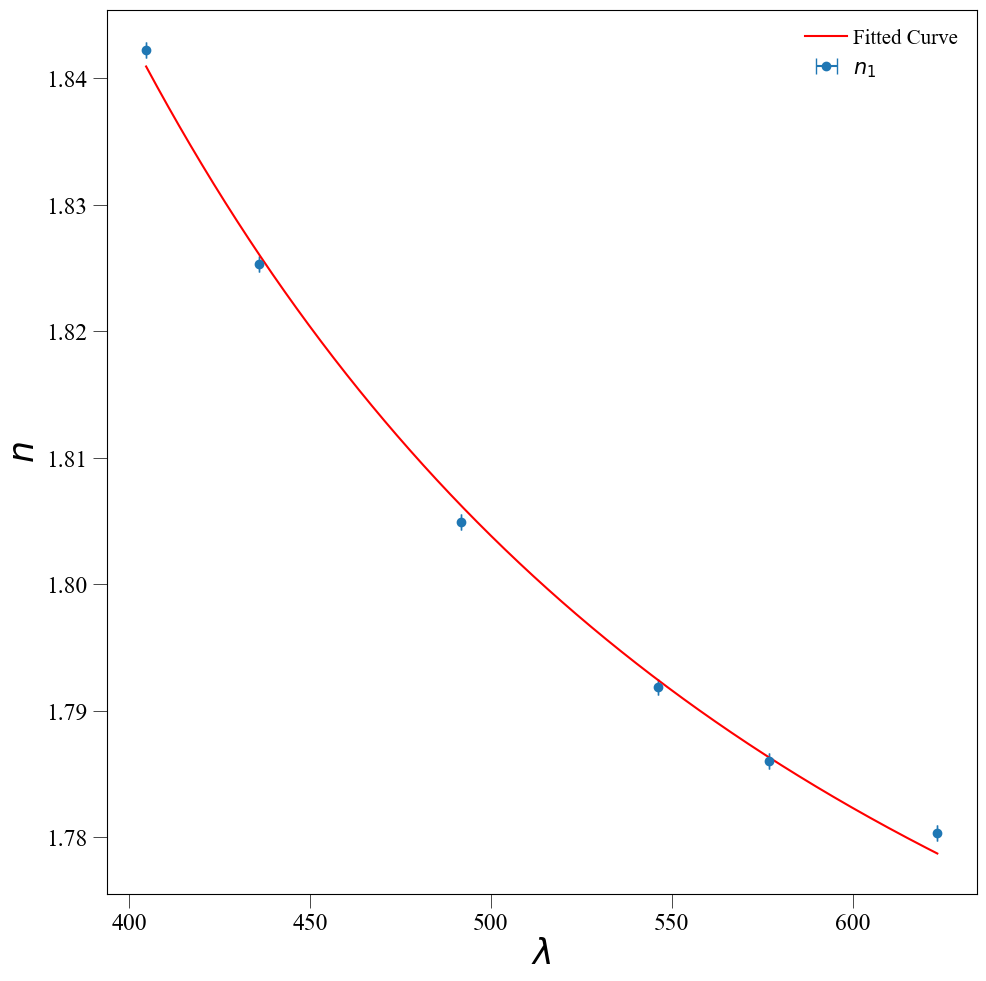

In [11]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 10))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\lambda$")
ax.xaxis.label.set_fontsize(25)
ax.set_ylabel(r"$n$")
ax.yaxis.label.set_fontsize(25)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.errorbar(lambda_m, waves['n_1'].apply(lambda x: x.nominal_value), xerr=waves['n_1'].apply(lambda x: x.std_dev), marker='o', linestyle='none', markersize=6, capsize=6, color=colors[5], label=r'$n_1$')
ax.plot(lambda_val, n_val, label='Fitted Curve', color='red')
# ax.plot()

handles, labels = ax.get_legend_handles_labels()
order = [0, 1]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper right", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

# fig.savefig('images/index.png', bbox_inches='tight')